In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.preprocessing import image

import numpy as np

In [28]:
# checking if GPU is enbled
tf.test.is_gpu_available()

False

### Data Augmentation

In [29]:
training_data_generator = ImageDataGenerator(rescale = 1/255, 
                                            horizontal_flip=True, 
                                            vertical_flip=True,
                                            shear_range = 0.2,
                                            zoom_range=0.2, 
                                            width_shift_range=0.2, 
                                            height_shift_range=0.2,
                                            validation_split=0.1)

In [30]:
tr = training_data_generator.flow_from_directory("./fire_smoke_data/training",
                                                target_size=(256,256),
                                                color_mode="rgb",
                                                class_mode= "binary",
                                                batch_size=16,
                                                subset="training")

va = training_data_generator.flow_from_directory("./fire_smoke_data/training",
                                                target_size=(256,256),
                                                color_mode="rgb",
                                                class_mode= "binary",
                                                batch_size=16,
                                                subset="validation")

Found 12360 images belonging to 2 classes.
Found 1373 images belonging to 2 classes.


### CNN Architecture building

In [31]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size=3, padding='same', activation="relu", input_shape = [256,256,3]),
    tf.keras.layers.MaxPool2D(pool_size=2),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size=3, padding='same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    
    tf.keras.layers.Conv2D(filters = 128, kernel_size=3, padding='same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=128, activation="relu"),
    
    tf.keras.layers.Dense(units=1, activation="sigmoid"),
])

In [32]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 128)     

#### Training the CNN model

In [33]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
batch_size = 16
checkpoints = tf.keras.callbacks.ModelCheckpoint("./models_cnn/CNN_fire_smoke.h5", 
                                                 monitor='val_loss', 
                                                 mode = "min", 
                                                 save_best_only=True)
callbacks = checkpoints

In [35]:
cnn.fit(tr, validation_data=va, epochs = 1, steps_per_epoch = tr.samples//batch_size,
                 validation_steps=va.samples//batch_size,
                 callbacks = callbacks)

772/772 [==============================] - 2147s 3s/step - loss: 0.0864 - accuracy: 0.9790 - val_loss: 0.0070 - val_accuracy: 0.9971


In [85]:
# from tensorflow.keras.models import load_model
test_image_path = "./fire_smoke_data/training/fire/Chimney-Fire3.jpg"

test_image_ = image.load_img(test_image_path, target_size = (256,256))
    
test_image = image.img_to_array(test_image_)

test_image = test_image/255

test_image = np.expand_dims(test_image, axis = 0)

res = cnn.predict(test_image)

1/1 [==============================] - 0s 70ms/step


In [86]:
res

array([[3.500846e-05]], dtype=float32)

In [87]:
res[0][0]

3.500846e-05

In [88]:
categories = ["Fire", "Smoke"]
if res[0][0] <= 0.5:
    print("It is fire !!!")
else:
    print("It is smoke !!!")

It is fire !!!


In [89]:
import matplotlib.pyplot as plt
import PIL

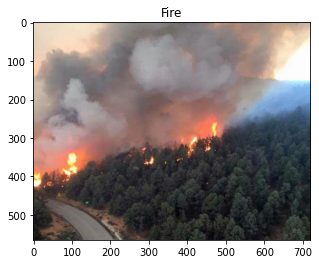

In [92]:
image_show = PIL.Image.open(test_image_path)
plt.imshow(image_show)
plt.title(categories[int(res[0][0] >= 0.5)])
plt.show()